In [89]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import copy
from models import LongRangeDNN
from utils import get_features, get_labels, subsample_data, normalize_features, reconstruct_2d, printMatrix, binarize, zscore, get_2D, plot_prediction, change_scale 
#from sklearn.preprocessing import MinMaxScaler, StandardScaler
#from dragonn.models import Model, SequenceDNN
#from keras.models import Sequential
#from keras.callbacks import Callback, EarlyStopping
#from keras.layers.core import (
#    Activation, Dense, Dropout, Flatten,
#    Permute, Reshape, TimeDistributedDense
#)
#from keras.layers.convolutional import Convolution2D, MaxPooling2D
#from keras.layers.recurrent import GRU
#from keras.regularizers import l1

#from deeplift import keras_conversion as kc
#from deeplift.blobs import MxtsMode

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [90]:
data_path='/users/mtaranov/NN_all_data/'

X_train = get_features('/users/mtaranov/NN_thres5max/dist_matched/X_train_thres_7.npy')
y_train = get_labels('/users/mtaranov/NN_thres5max/dist_matched/y_train_thres_7.npy')
X_valid = get_features('/users/mtaranov/NN_thres5max/dist_matched/X_valid_thres_7.npy')
y_valid = get_labels('/users/mtaranov/NN_thres5max/dist_matched/y_valid_thres_7.npy')
X_test = get_features('/users/mtaranov/NN_thres5max/dist_matched/X_test_thres_7.npy')
y_test = get_labels('/users/mtaranov/NN_thres5max/dist_matched/y_test_thres_7.npy')

"""
X_train = get_features(data_path+'train_set_upperTriangle_noDiag_reads.npy')
y_train = get_labels(data_path+'labels_train_upperTriangle_noDiag.npy')
X_valid = get_features(data_path+'vali_set_upperTriangle_noDiag_reads.npy')
y_valid = get_labels(data_path+'labels_vali_upperTriangle_noDiag.npy')
X_test = get_features(data_path+'test_set_upperTriangle_noDiag_reads.npy')
y_test = get_labels(data_path+'labels_test_upperTriangle_noDiag.npy')

X_train = get_features('NN_datasets/train_set_all_reads.npy')
y_train = get_labels('NN_datasets/labels_train_all.npy')
X_valid = get_features('NN_datasets/vali_set_all_reads.npy')
y_valid = get_labels('NN_datasets/labels_vali_all.npy')
X_test = get_features('NN_datasets/test_set_all_reads.npy')
y_test = get_labels('NN_datasets/labels_test_all.npy')

X_train_subsampled, y_train_subsampled = subsample_data(X_train, y_train)
X_valid_subsampled, y_valid_subsampled = subsample_data(X_valid, y_valid)
X_test_subsampled, y_test_subsampled = subsample_data(X_test, y_test)
"""

"\nX_train = get_features(data_path+'train_set_upperTriangle_noDiag_reads.npy')\ny_train = get_labels(data_path+'labels_train_upperTriangle_noDiag.npy')\nX_valid = get_features(data_path+'vali_set_upperTriangle_noDiag_reads.npy')\ny_valid = get_labels(data_path+'labels_vali_upperTriangle_noDiag.npy')\nX_test = get_features(data_path+'test_set_upperTriangle_noDiag_reads.npy')\ny_test = get_labels(data_path+'labels_test_upperTriangle_noDiag.npy')\n\nX_train = get_features('NN_datasets/train_set_all_reads.npy')\ny_train = get_labels('NN_datasets/labels_train_all.npy')\nX_valid = get_features('NN_datasets/vali_set_all_reads.npy')\ny_valid = get_labels('NN_datasets/labels_vali_all.npy')\nX_test = get_features('NN_datasets/test_set_all_reads.npy')\ny_test = get_labels('NN_datasets/labels_test_all.npy')\n\nX_train_subsampled, y_train_subsampled = subsample_data(X_train, y_train)\nX_valid_subsampled, y_valid_subsampled = subsample_data(X_valid, y_valid)\nX_test_subsampled, y_test_subsampled = 

In [91]:
X_train_normalized, X_valid_normalized, X_test_normalized = normalize_features(X_train, X_valid, X_test)

#X_train_normalized_subsampled, y_train_subsampled = subsample_data(X_train_normalized, y_train)
#X_valid_normalized_subsampled, y_valid_subsampled = subsample_data(X_valid_normalized, y_valid)
#X_test_normalized_subsampled, y_test_subsampled = subsample_data(X_test_normalized, y_test)

#X_train_scaled_subsampled, y_train_subsampled = subsample_data(X_train_scaled, y_train)
#X_valid_scaled_subsampled, y_valid_subsampled = subsample_data(X_valid_scaled, y_valid)
#X_test_scaled_subsampled, y_test_subsampled = subsample_data(X_test_scaled, y_test)


# without distance

In [92]:
dnn_normalized = LongRangeDNN(num_features=10, use_deep_CNN=True)

In [94]:
#validation_data = (X_valid_normalized_subsampled[:, :, :10, :], y_valid_subsampled)
#dnn_normalized.train(X_train_normalized_subsampled[:, :, :10, :], y_train_subsampled, validation_data)
validation_data = (X_valid_normalized[:, :, :10, :], y_valid)
dnn_normalized.train(X_train_normalized[:, :, :10, :], y_train, validation_data)

Training model...
Train on 2326 samples, validate on 1460 samples
Epoch 1/100
2326/2326 [==============================] - 0s - loss: 1.3337 - val_loss: 0.6684
Epoch 0: validation loss: 0.668
Balanced Accuracy: 61.58%	 auROC: 0.653	 auPRC: 0.624	 auPRG: 0.314
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 730	 Num Negatives: 730	 

Epoch 2/100
2326/2326 [==============================] - 0s - loss: 1.3063 - val_loss: 0.6541
Epoch 1: validation loss: 0.654
Balanced Accuracy: 64.25%	 auROC: 0.673	 auPRC: 0.651	 auPRG: 0.351
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 730	 Num Negatives: 730	 

Epoch 3/100
2326/2326 [==============================] - 0s - loss: 1.2714 - val_loss: 0.6367
Epoch 2: validation loss: 0.637
Balanced Accuracy: 64.38%	 auROC: 0.694	 auPRC: 0.680	 auPRG: 0.380
Recall at 5%|10%|20% FDR: 0.0%|0.0%|13.6%	 Num Positives: 730	 Num Negatives: 730	 

Epoch 4/100
2326/2326 [==============================] - 0s - loss: 1.2421 - val_loss: 0.6232
Epoch

In [95]:
print(dnn_normalized.test(X_test_normalized[:, :, :10, :], y_test))

Balanced Accuracy: 66.19%	 auROC: 0.718	 auPRC: 0.722	 auPRG: 0.435
Recall at 5%|10%|20% FDR: 5.5%|8.8%|26.4%	 Num Positives: 454	 Num Negatives: 454	 


In [96]:
print(dnn_normalized.test(X_train_normalized[:, :, :10:, :], y_train))

Balanced Accuracy: 76.27%	 auROC: 0.844	 auPRC: 0.854	 auPRG: 0.712
Recall at 5%|10%|20% FDR: 33.8%|48.7%|68.8%	 Num Positives: 1163	 Num Negatives: 1163	 


In [97]:
print(dnn_normalized.test(X_valid_normalized[:, :, :10, :], y_valid))

Balanced Accuracy: 67.60%	 auROC: 0.751	 auPRC: 0.758	 auPRG: 0.499
Recall at 5%|10%|20% FDR: 1.2%|17.5%|43.8%	 Num Positives: 730	 Num Negatives: 730	 


In [98]:
pred_probs_test = dnn_normalized.predict(X_test_normalized[:, :, :10, :])
#np.save("model_predictions/test_set_upperTriangle_noDiag_reads_with_distances_full_valid.npy", pred_probs_test)
pred_probs_valid = dnn_normalized.predict(X_valid_normalized[:, :, :10, :])
#np.save("model_predictions/valid_set_upperTriangle_noDiag_reads_with_distances_full_valid.npy", pred_probs_valid)
pred_probs_train = dnn_normalized.predict(X_train_normalized[:, :, :10, :])
#np.save("model_predictions/train_set_upperTriangle_noDiag_reads_with_distances_full_valid.npy", pred_probs_train)

# with genomic locations

In [99]:
dnn_normalized = LongRangeDNN(num_features=11, use_deep_CNN=True)

In [100]:
#validation_data = (X_valid_normalized_subsampled[:, :, :11, :], y_valid_subsampled)
#dnn_normalized.train(X_train_normalized_subsampled[:, :, :11, :], y_train_subsampled, validation_data)
validation_data = (X_valid_normalized[:, :, :11, :], y_valid)
dnn_normalized.train(X_train_normalized[:, :, :11, :], y_train, validation_data)

Training model...
Train on 2326 samples, validate on 1460 samples
Epoch 1/100
2326/2326 [==============================] - 0s - loss: 1.3834 - val_loss: 0.6832
Epoch 0: validation loss: 0.683
Balanced Accuracy: 54.18%	 auROC: 0.617	 auPRC: 0.600	 auPRG: 0.237
Recall at 5%|10%|20% FDR: 0.3%|0.3%|0.3%	 Num Positives: 730	 Num Negatives: 730	 

Epoch 2/100
2326/2326 [==============================] - 0s - loss: 1.3519 - val_loss: 0.6721
Epoch 1: validation loss: 0.672
Balanced Accuracy: 56.51%	 auROC: 0.666	 auPRC: 0.647	 auPRG: 0.343
Recall at 5%|10%|20% FDR: 0.5%|1.4%|2.3%	 Num Positives: 730	 Num Negatives: 730	 

Epoch 3/100
2326/2326 [==============================] - 0s - loss: 1.3290 - val_loss: 0.6610
Epoch 2: validation loss: 0.661
Balanced Accuracy: 59.18%	 auROC: 0.691	 auPRC: 0.669	 auPRG: 0.393
Recall at 5%|10%|20% FDR: 1.0%|1.5%|3.0%	 Num Positives: 730	 Num Negatives: 730	 

Epoch 4/100
2326/2326 [==============================] - 0s - loss: 1.3089 - val_loss: 0.6511
Epoch 

In [101]:
print(dnn_normalized.test(X_test_normalized[:, :, :11, :], y_test))

Balanced Accuracy: 67.07%	 auROC: 0.727	 auPRC: 0.727	 auPRG: 0.453
Recall at 5%|10%|20% FDR: 0.0%|0.0%|31.7%	 Num Positives: 454	 Num Negatives: 454	 


# with distance only

In [102]:
dnn_normalized = LongRangeDNN(num_features=1, use_deep_CNN=True)

In [103]:
#validation_data = (X_valid_normalized_subsampled[:, :, :11, :], y_valid_subsampled)
#dnn_normalized.train(X_train_normalized_subsampled[:, :, :11, :], y_train_subsampled, validation_data)
validation_data = (X_valid_normalized[:, :, 10:, :], y_valid)
dnn_normalized.train(X_train_normalized[:, :, 10:, :], y_train, validation_data)

Training model...
Train on 2326 samples, validate on 1460 samples
Epoch 1/100
2326/2326 [==============================] - 0s - loss: 1.3675 - val_loss: 0.6782
Epoch 0: validation loss: 0.678
Balanced Accuracy: 58.77%	 auROC: 0.603	 auPRC: 0.576	 auPRG: 0.208
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 730	 Num Negatives: 730	 

Epoch 2/100
2326/2326 [==============================] - 0s - loss: 1.3611 - val_loss: 0.6791
Epoch 1: validation loss: 0.679
Balanced Accuracy: 58.56%	 auROC: 0.603	 auPRC: 0.576	 auPRG: 0.207
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 730	 Num Negatives: 730	 

Epoch 3/100
2326/2326 [==============================] - 0s - loss: 1.3605 - val_loss: 0.6775
Epoch 2: validation loss: 0.678
Balanced Accuracy: 58.70%	 auROC: 0.603	 auPRC: 0.576	 auPRG: 0.207
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 730	 Num Negatives: 730	 

Epoch 4/100
2326/2326 [==============================] - 0s - loss: 1.3605 - val_loss: 0.6774
Epoch 

In [104]:
print(dnn_normalized.test(X_test_normalized[:, :,  10:, :], y_test))

Balanced Accuracy: 56.83%	 auROC: 0.572	 auPRC: 0.543	 auPRG: 0.115
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 454	 Num Negatives: 454	 


# Print prediction

In [105]:
indx_train = np.load('/users/mtaranov/NN_thres5max/dist_matched/indx_train_thres_7.npy')
indx_valid = np.load('/users/mtaranov/NN_thres5max/dist_matched/indx_valid_thres_7.npy')
indx_test = np.load ('/users/mtaranov/NN_thres5max/dist_matched/indx_test_thres_7.npy')

In [106]:
labels_all=(np.concatenate((y_train, y_valid, y_test), axis=0)).astype(int)
preds_all=(np.concatenate((pred_probs_train, pred_probs_valid, pred_probs_test), axis=0))
indx_all=np.concatenate((indx_train, indx_valid, indx_test), axis=0)

labels_chr1 = labels_all[np.ravel(np.where(indx_all[:,2]==1))]
preds_chr1 = preds_all[np.ravel(np.where(indx_all[:,2]==1))]
indx_chr1 = indx_all[np.ravel(np.where(indx_all[:,2]==1))]

In [107]:
NumberOfNodes=2272
preds_chr1_2d, labels_chr1_2d = get_2D(indx_chr1, preds_chr1, labels_chr1, NumberOfNodes)
# preds_test_2d, labels_test_2d = get_2D(indx_test, preds_test, labels_test, NumberOfNodes)

Some tests on adjacency matrix:
Some tests on adjacency matrix:


In [108]:
# printMatrix(preds_chr1_2d, '', 1, 1, title='preds')
# printMatrix(labels_chr1_2d, '', 1, 1, title='Captures')

1.0
(60, 60)
Limit: 1.0


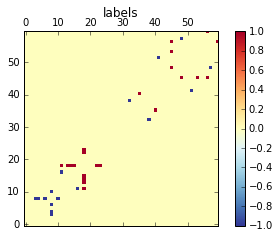

0.985373437405
(60, 60)
Limit: 0.985373437405


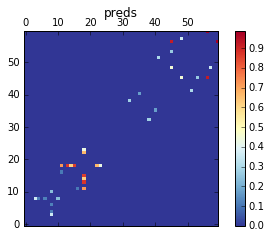

In [114]:
zoomIn_window = (400,460)
NumberOfNodes=2272
plot_prediction(change_scale(preds_chr1_2d)+change_scale(preds_chr1_2d).T, change_scale(labels_chr1_2d)+change_scale(labels_chr1_2d).T, zoomIn_window, )